<h1><b>Pipelining (Multi-class Classification)</b></h1>

<b>In machine learning, pipelining refers to the process of chaining together multiple data processing steps into a single workflow or pipeline. These steps can include data preprocessing, feature extraction, feature selection, and model training. The purpose of pipelining is to streamline the workflow, making it easier to organize and manage complex processes, especially when dealing with large datasets.</b>

<h3 style="color: blue;"><b>Loading Libraries</b></h3>

In [1]:
# Data loading and manipulating libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Train Test Split
from sklearn.model_selection import train_test_split

# Feature Engineering-Encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# Feature Selection and Feature Reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Oversampling the lower target class
from imblearn.over_sampling import SMOTE

# Evaluation Metrics
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

#Pipeline imports
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Classification Algorithm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

<h3 style="color: blue;"><b>Reading The Dataset</b></h3>

In [2]:
df=pd.read_csv("data/clean_data.csv")
df.rename({'status':'isClosed'}, axis=1, inplace=True)
df['isClosed'].replace({'operating':0,'ipo':1,'acquired':2,'closed':3}, inplace=True)
df.head()

,category_code,isClosed,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,active_days
0,web,2,2007,USA,2008,2008,1,5000000.0,2008,2012,3,14,37.386052,-122.083851,4015.0
1,enterprise,0,2004,USA,2011,2011,1,1500000.0,2010,2010,1,8,47.610150,-122.201516,6205.0
2,web,0,2006,USA,2007,2007,1,2500000.0,2010,2012,2,7,37.774929,-122.419415,5475.0
3,ecommerce,0,2004,USA,2011,2011,1,3800000.0,2012,2012,1,9,47.610150,-122.201516,6205.0
4,games_video,0,2011,USA,2011,2011,1,40000.0,2012,2012,1,5,37.774929,-122.419415,3650.0


In [3]:
##due to multicollinearity
df.drop(['first_funding_at','first_milestone_at'], axis=1, inplace=True)

<h3 style="color: blue;"><b>Train-Test Splitting</b></h2>

In [4]:
X = df.drop('isClosed', axis=1) #independent variable
y = df['isClosed'] #target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("===============================================================")
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (7064, 12) (7064,)
Testing set shape: (1766, 12) (1766,)


In [5]:
categorical_columns = ['country_code', 'category_code'] 
numeric_columns = ['founded_at','last_funding_at','funding_rounds',
                      'funding_total_usd','last_milestone_at','milestones',
                      'relationships','lat','lng','active_days']

<h3 style="color: blue;"><b>Creation of Columns Transformer and Other Transformer</b></h2>

In [6]:
#scaling 
trf1 = ColumnTransformer([
    ('StandardScaler', StandardScaler(), numeric_columns)
])

In [8]:
#Categorical encoding
trf2= ColumnTransformer([
    ('OneHotEncoded', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  
], remainder='passthrough')


In [9]:
#Synthetic Minority Over-sampling Technique
trf2 = SMOTE(random_state=0)

In [10]:
#Mutual Information Score
trf3 =  SelectKBest(mutual_info_classif, k='all')

In [11]:
#Principal Component Analysis
trf4 = PCA()

<h3 style="color: blue;"><b>Models</b></h2>

In [12]:
classifier_dt = DecisionTreeClassifier()
classifier_lda = LinearDiscriminantAnalysis()
classifier_gbc = GradientBoostingClassifier()

<h3 style="color: blue;"><b>Creation of Pipeline for the Models</b></h2>

In [13]:
# Create a pipeline for DecisionTreeClassifier()
pipeline_dt = ImbPipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4),
    ('classifier', classifier_dt),
])

# Create a pipeline for LinearDiscriminantAnalysis()
pipeline_lda = ImbPipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4),
    ('classifier', classifier_lda),
])

# Create a pipeline for GradientBoostingClassifier()
pipeline_gbc = ImbPipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4),
    ('classifier', classifier_gbc),
])


<h3 style="color: blue;"><b>Fit and evaluating the DecisionTreeClassifier pipeline</b></h2>

DecisionTreeClassifier Metrics:
Train Accuracy=0.9122310305775765
Test Accuracy=0.9122310305775765
Precision=0.9203804586130817
Recall=0.9122310305775765
F1 Score=0.9155435517159352


Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1506
           1       0.44      0.44      0.44        16
           2       0.63      0.73      0.67       211
           3       0.65      0.79      0.71        33

    accuracy                           0.91      1766
   macro avg       0.67      0.73      0.70      1766
weighted avg       0.92      0.91      0.92      1766



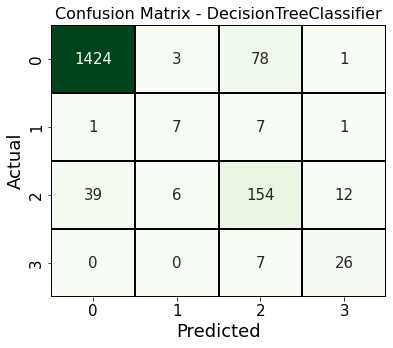

In [14]:
pipeline_dt.fit(X_train, y_train)
y_pred_dt = pipeline_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted') 
recall_dt = recall_score(y_test, y_pred_dt, average='weighted') 
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')  
print("==================================================================")
print("DecisionTreeClassifier Metrics:")
print("Train Accuracy={}".format(accuracy_dt))
print("Test Accuracy={}".format(accuracy_dt))
print("Precision={}".format(precision_dt))
print("Recall={}".format(recall_dt))
print("F1 Score={}".format(f1_dt))
print("==================================================================")
print("\n")
print("Classification Report for DecisionTreeClassifier:")
print(classification_report(y_test, y_pred_dt))
print("==================================================================")
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, annot_kws={"fontsize": 15}, linewidths=2,
            linecolor='black', cmap='Greens', cbar=False, fmt='g')
plt.title("Confusion Matrix - DecisionTreeClassifier", fontsize=16)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<h3 style="color: blue;"><b>Fit and evaluating the LinearDiscriminantAnalysis pipeline</b></h2>

LinearDiscriminantAnalysis Metrics:
Train Accuracy=0.8408833522083805
Test Accuracy=0.8408833522083805
Precision=0.8808812319883738
Recall=0.8408833522083805
F1 Score=0.8562809737777821


Classification Report for LinearDiscriminantAnalysis:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1506
           1       0.28      0.81      0.41        16
           2       0.41      0.53      0.46       211
           3       0.42      0.82      0.56        33

    accuracy                           0.84      1766
   macro avg       0.52      0.76      0.59      1766
weighted avg       0.88      0.84      0.86      1766



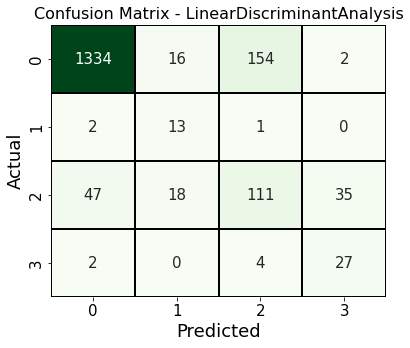

In [15]:
pipeline_lda.fit(X_train, y_train)
y_pred_lda = pipeline_lda.predict(X_test)

accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda, average='weighted') 
recall_lda = recall_score(y_test, y_pred_lda, average='weighted') 
f1_lda = f1_score(y_test, y_pred_lda, average='weighted') 

print("==================================================================")
print("LinearDiscriminantAnalysis Metrics:")
print("Train Accuracy={}".format(accuracy_lda))
print("Test Accuracy={}".format(accuracy_lda))
print("Precision={}".format(precision_lda))
print("Recall={}".format(recall_lda))
print("F1 Score={}".format(f1_lda))
print("==================================================================")
print("\n")
print("Classification Report for LinearDiscriminantAnalysis:")
print(classification_report(y_test, y_pred_lda))
print("==================================================================")
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lda), annot=True, annot_kws={"fontsize": 15}, linewidths=2,
            linecolor='black', cmap='Greens', cbar=False, fmt='g')
plt.title("Confusion Matrix - LinearDiscriminantAnalysis", fontsize=16)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print("==================================================================")


<h3 style="color: blue;"><b>Fit and evaluating the GradientBoostingClassifier pipeline</b></h2>

GradientBoostingClassifier Metrics:
Train Accuracy=0.9161947904869762
Test Accuracy=0.9161947904869762
Precision=0.9352202104827096
Recall=0.9161947904869762
F1 Score=0.9224379929445586


Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1506
           1       0.50      0.81      0.62        16
           2       0.62      0.85      0.72       211
           3       0.81      0.79      0.80        33

    accuracy                           0.92      1766
   macro avg       0.73      0.85      0.77      1766
weighted avg       0.94      0.92      0.92      1766



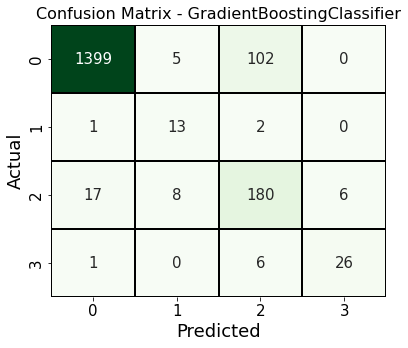

In [16]:
pipeline_gbc.fit(X_train, y_train)
y_pred_gbc = pipeline_gbc.predict(X_test)

accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
precision_gbc = precision_score(y_test, y_pred_gbc, average='weighted') 
recall_gbc = recall_score(y_test, y_pred_gbc, average='weighted') 
f1_gbc = f1_score(y_test, y_pred_gbc, average='weighted') 
print("==================================================================")
print("GradientBoostingClassifier Metrics:")
print("Train Accuracy={}".format(accuracy_gbc))
print("Test Accuracy={}".format(accuracy_gbc))
print("Precision={}".format(precision_gbc))
print("Recall={}".format(recall_gbc))
print("F1 Score={}".format(f1_gbc))
print("==================================================================")
print("\n")
print("Classification Report for GradientBoostingClassifier:")
print(classification_report(y_test, y_pred_gbc))
print("==================================================================")
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_gbc), annot=True, annot_kws={"fontsize": 15}, linewidths=2,
            linecolor='black', cmap='Greens', cbar=False, fmt='g')
plt.title("Confusion Matrix - GradientBoostingClassifier", fontsize=16)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


### Gradient Boosting Classifier is the best multiclass model.